### K-nearest neighbors
Hunter Jenkins

https://archive.ics.uci.edu/dataset/222/bank+marketing


Using the kNN to predict whether or not a user will subscribe to a term deposit depedent on age, ocupation, eduation, and maritial status
Can be used by cold callers to target a specefic demographic

In [31]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('/Users/hunterjenkins/Downloads/bank+marketing/bank/bank-full.csv', sep=';')

# Apply one-hot encoding to the categorical columns
encoded_columns = pd.get_dummies(dataset[['job', 'marital', 'education']])

# Combine the encoded columns with the 'age' column
prepared_data = pd.concat([dataset[['age']], encoded_columns], axis=1)

# Display the first few rows of the prepared data to verify
print(prepared_data.head())

X = prepared_data.iloc[:, [0,3]].values
y = prepared_data.iloc[:, 16].values


dataset

   age  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0   58       False            False             False          False   
1   44       False            False             False          False   
2   33       False            False              True          False   
3   47       False             True             False          False   
4   33       False            False             False          False   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0            True        False              False         False        False   
1           False        False              False         False        False   
2           False        False              False         False        False   
3           False        False              False         False        False   
4           False        False              False         False        False   

   job_technician  job_unemployed  job_unknown  marital_divorced  \
0           False 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Split and train the data


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



### Scale the training and test sets

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### kNN classifier fitted to the training set 

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
numNeighbors = 10
classifier = KNeighborsClassifier(n_neighbors = numNeighbors)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

### Classification predictions on the testing set



In [35]:
y_pred = classifier.predict(X_test)
print("Accuracy of model at K=", numNeighbors," is",metrics.accuracy_score(y_test, y_pred))



Accuracy of model at K= 10  is 0.8488896753074405


### Create and Visualize the confusion matrix

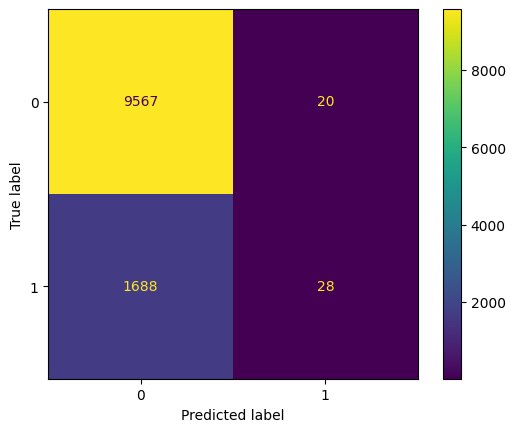

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm).plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


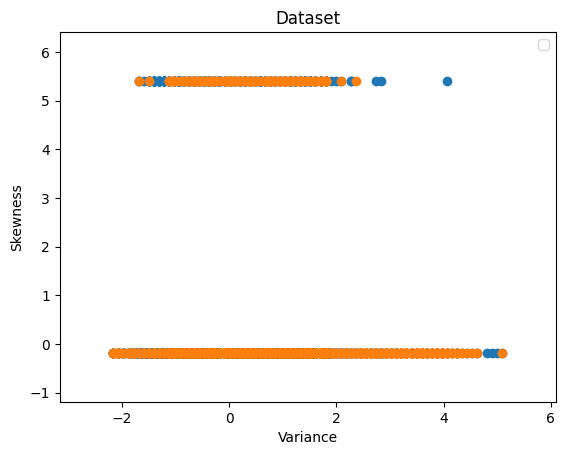

In [37]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1])
plt.title('Dataset')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.legend()
plt.show()

### Visualize the Training set results

/var/folders/_w/w3pp1_q97915fqnfqz714sym0000gn/T/ipykernel_51374/1884292843.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


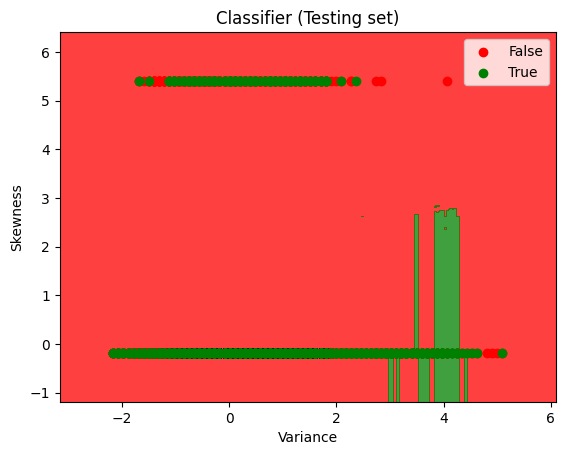

In [38]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Testing set)')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.legend()
plt.show()


/var/folders/_w/w3pp1_q97915fqnfqz714sym0000gn/T/ipykernel_51374/3803451919.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


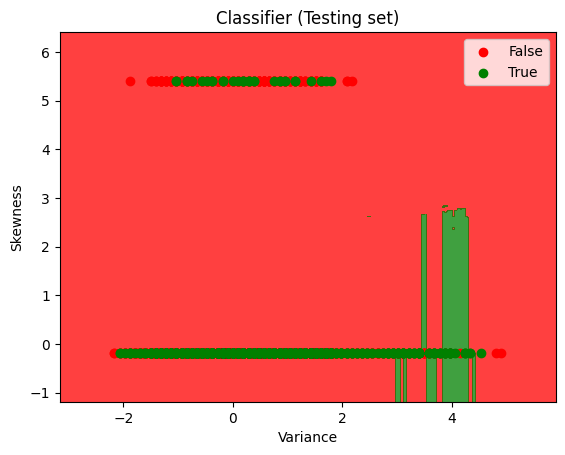

In [39]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Testing set)')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.legend()
plt.show()

### Improving the model and finding the optimal value

Minimum error:- 0.1503140759090507 at K = 32


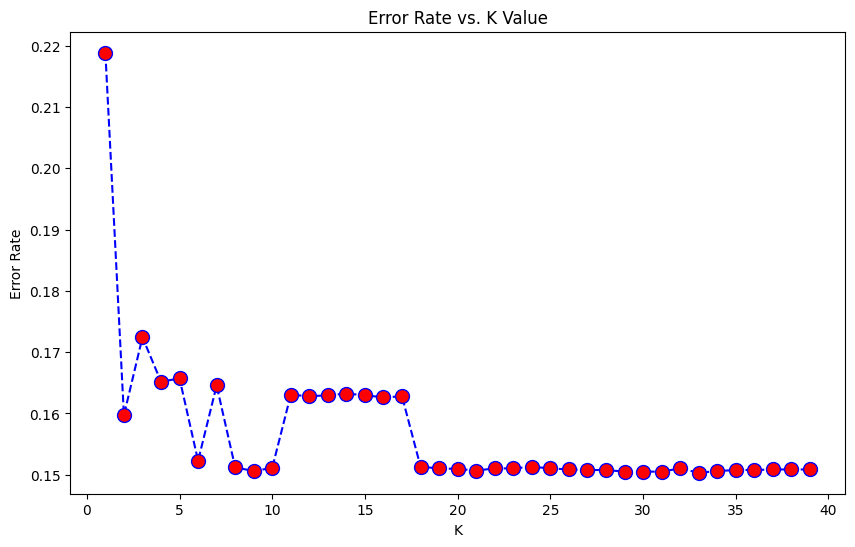

In [40]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))